<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#import csv
#data = csv.reader(open('sat_scores.csv'))

#sat = {row[0]:row[1:] for row in data if row and row[0]}
#print(sat)
rows = []

with open('sat_scores.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

header = rows[0]
data = rows[1:]

sat_df1 = {}

for index, column_name in enumerate(header):
    sat_df1[column_name] = []!
    for row in data:
        sat_df1[column_name].append(row[index])

SyntaxError: invalid syntax (<ipython-input-2-78c99d2d6fec>, line 19)

In [ ]:
# import Drug Use using read line
rows = []

with open('drug-use-by-age.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

header = rows[0]
data = rows[1:]

drug_df2 = {}

for index, column_name in enumerate(header):
    drug_df2[column_name] = []
    for row in data:
        drug_df2[column_name].append(row[index])

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [ ]:
#pandas DataFrame object with the SAT dictionary
df= pd.DataFrame(sat_df1)
df

In [ ]:
#DataFrames using the .dtypes
df.dtypes

In [5]:
#pandas .read_csv
df = pd.read_csv('sat_scores.csv')
#df1['Rate'].astype(str).astype(int)
df

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
#df1

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [7]:
#df['State']

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
#x=pd.read_csv('sat_scores.csv',squeeze=True).to_dict()
#x
sat_dict = {}

sat_dict['variables'] = list(df.columns)
sat_dict['types'] = ['String', 'Integer', 'Integer', 'Integer']
sat_dict['description'] = ['State', 'Rate', 'Verbal', 'Math']
sat_dict['shape'] = [4, 51, 51, 51]

sat_dict



{'variables': ['State', 'Rate', 'Verbal', 'Math'],
 'types': ['String', 'Integer', 'Integer', 'Integer'],
 'description': ['State', 'Rate', 'Verbal', 'Math'],
 'shape': [4, 51, 51, 51]}

In [10]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


(52, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

/Users/ravichandra/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


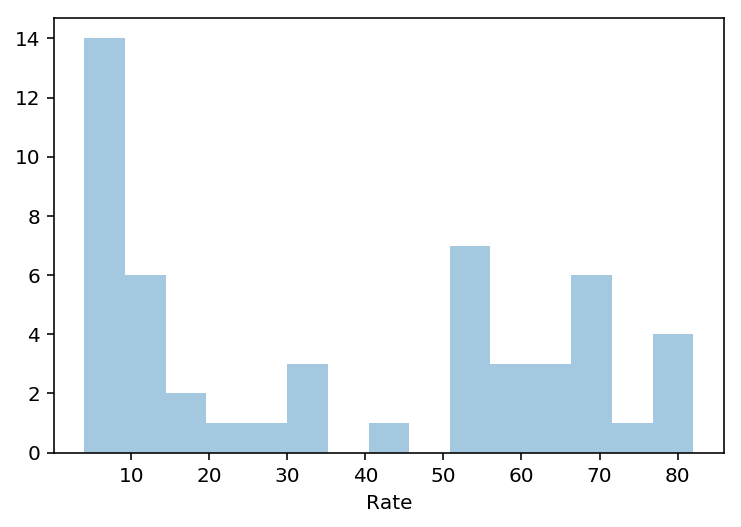

In [11]:
sns.distplot(df['Rate'], kde=False,bins=15) 

/Users/ravichandra/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


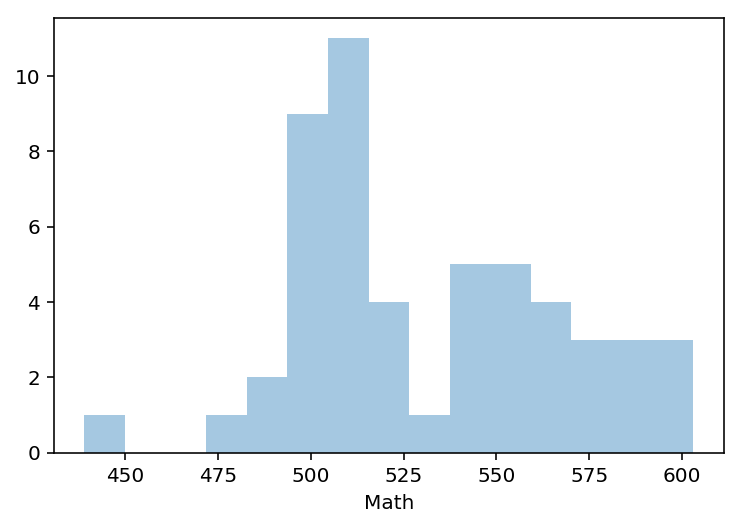

In [12]:
sns.distplot(df['Math'], kde=False,bins=15) 

/Users/ravichandra/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


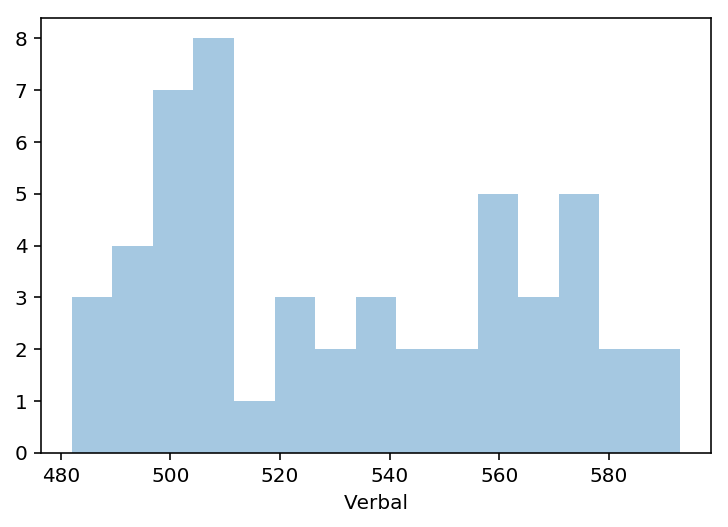

In [13]:
sns.distplot(df['Verbal'], kde=False,bins=15)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

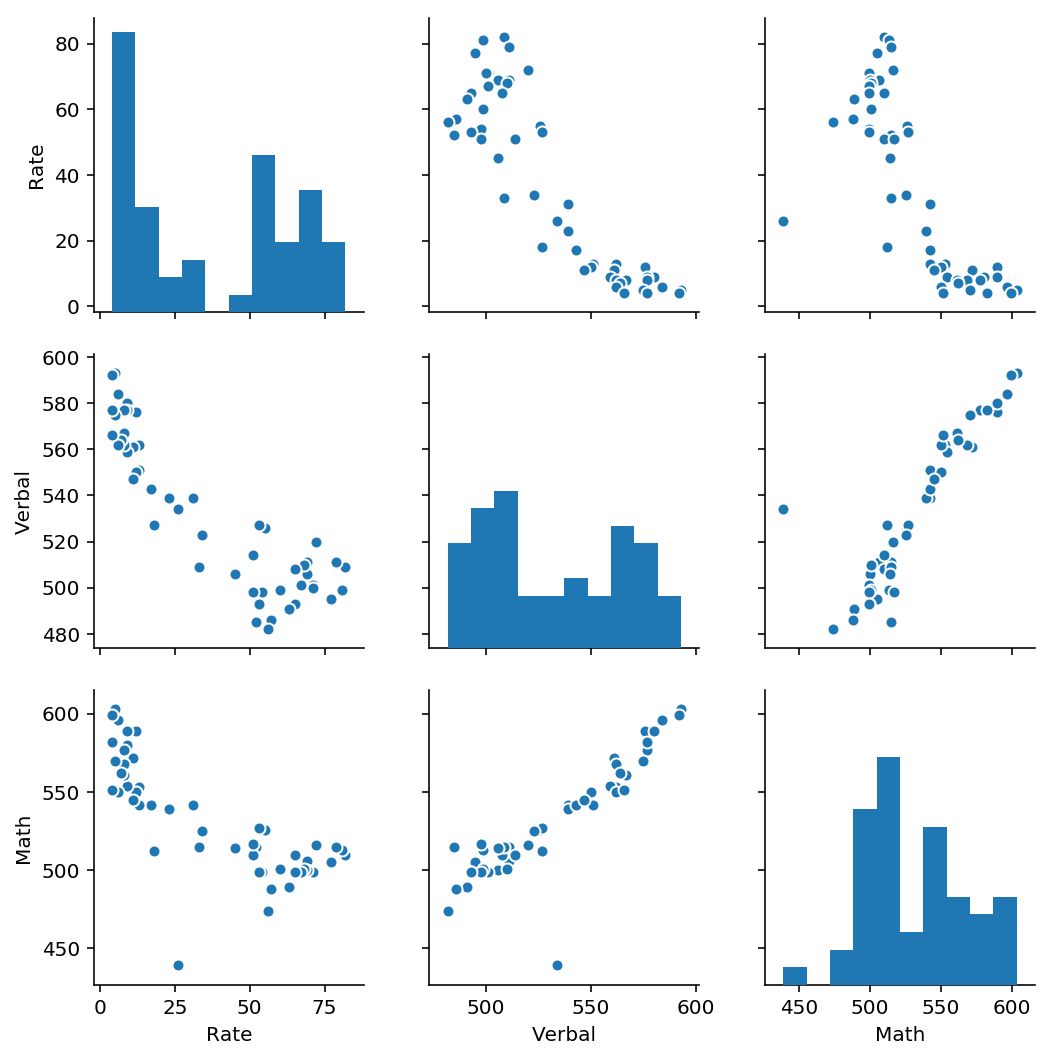

In [15]:
sns.pairplot(df,palette='coolwarm')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5,1,'Verbal and Maths per States')

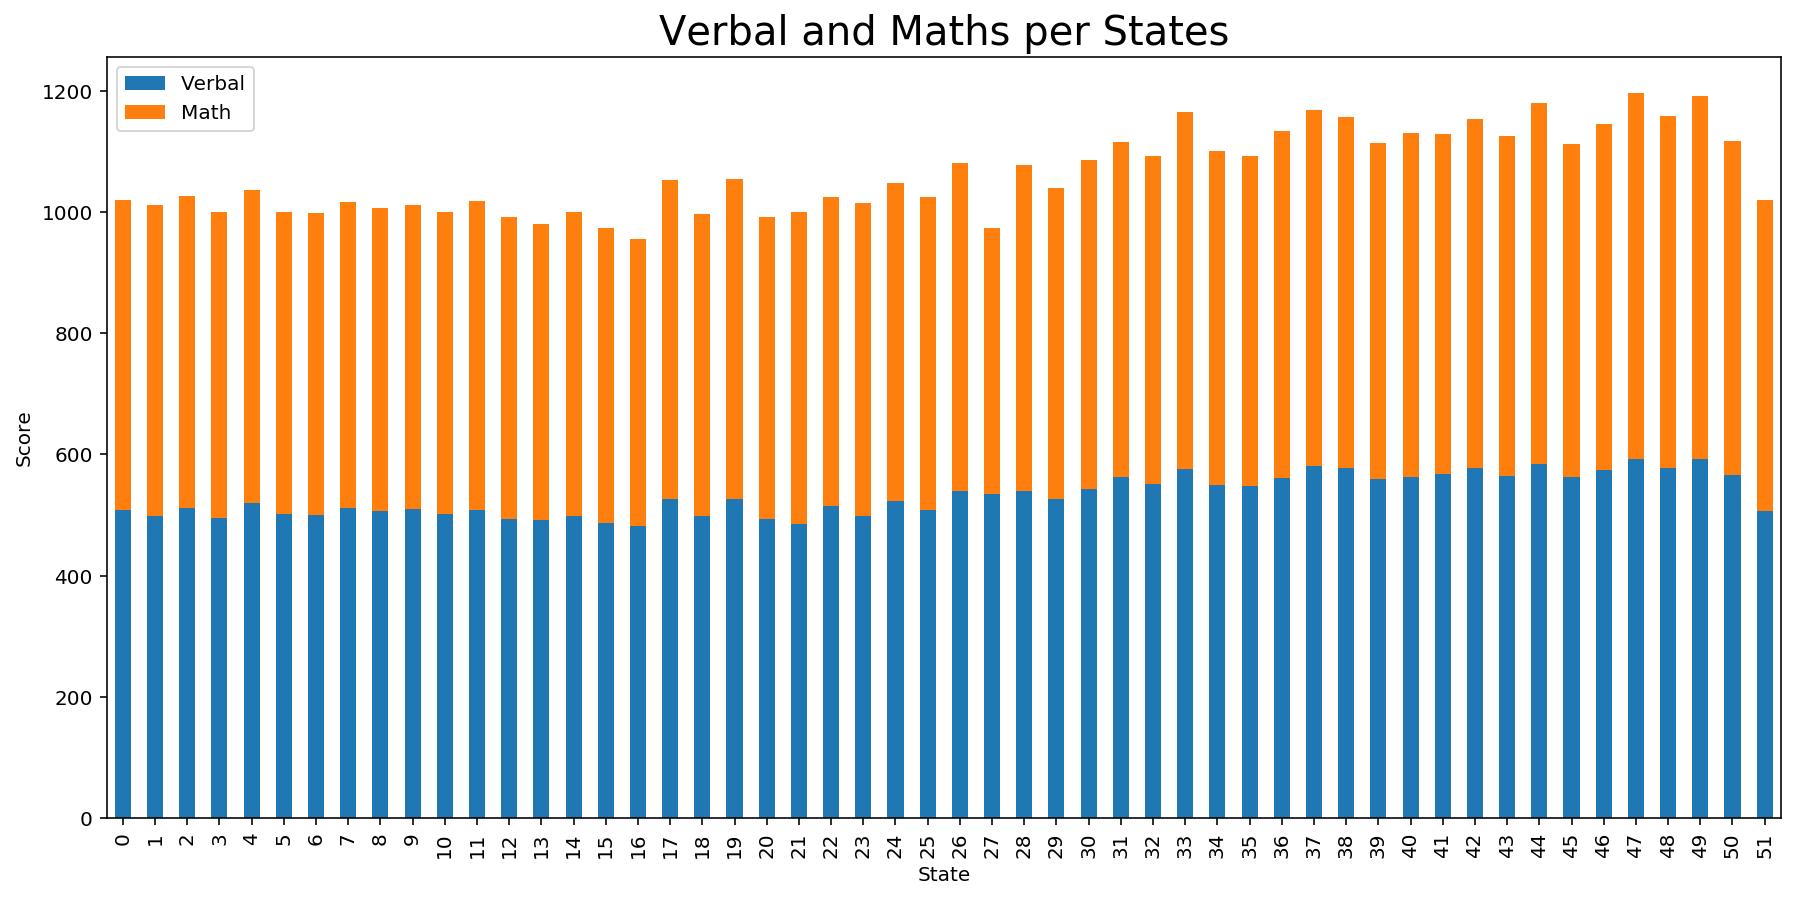

In [16]:
import matplotlib.pyplot as plt
#pd.DataFrame(df, columns=['Verbal','Math'])
#plt.figure();
#df.plot.hist(stacked=True, bins=30)
x = df[['Verbal', 'Math']].plot(kind='bar', stacked=True, figsize=(15,7))

x.set_ylabel("Score")
x.set_xlabel("State")

x.set_title("Verbal and Maths per States", fontsize=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

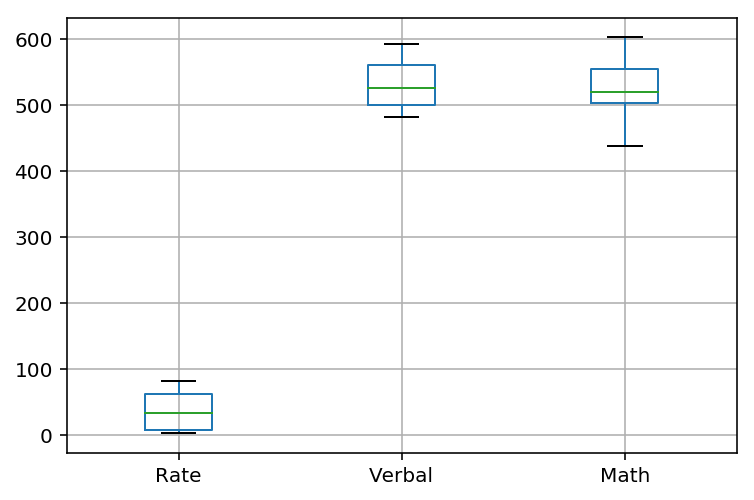

In [17]:
df.boxplot()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [18]:
def S_values(x):
    xout = (x-np.mean(x))/np.std(x)
    return xout

In [19]:
df1 = df.copy()
df1.Verbal = S_values(df1.Verbal.values)
df1.Math = S_values(df1.Math.values)
df1.Rate = S_values(df1.Rate.values)
df1.head()

,State,Rate,Verbal,Math
0,CT,1.658635,-0.699352,-0.602798
1,NJ,1.621650,-1.003164,-0.518687
2,MA,1.547680,-0.638589,-0.462613
3,NY,1.473710,-1.124689,-0.742984
4,NH,1.288785,-0.365159,-0.434575


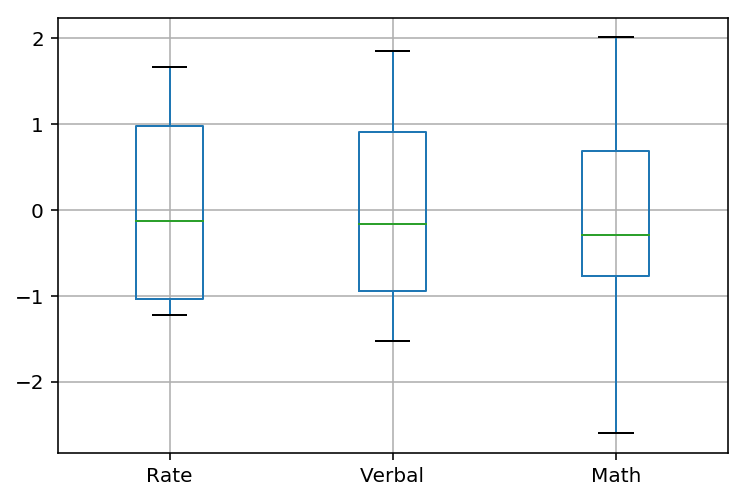

In [20]:
df1.boxplot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [21]:
df[df['Verbal'] > df['Verbal'].mean()]['State']


26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [22]:
df[df['Verbal'] > df['Verbal'].mean()]['State'].count()

24

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [23]:
df[df['Verbal'] > df['Verbal'].median()]['State']

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [24]:
df[df['Verbal'] > df['Verbal'].median()]['State'].count()

26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [25]:
d_v_m = df.Verbal.values-df.Math.values
df['d_v_m']=d_v_m
df

,State,Rate,Verbal,Math,d_v_m
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [26]:
x = df.sort_values('d_v_m',ascending=False)
x

,State,Rate,Verbal,Math,d_v_m
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [27]:
y = df.sort_values('d_v_m',ascending=True)
y

,State,Rate,Verbal,Math,d_v_m
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
51,All,45,506,514,-8


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [28]:
df.corr()

,Rate,Verbal,Math,d_v_m
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
d_v_m,-0.101412,0.052600,-0.388219,1.000000


 Coefficient, r:
Positive, Negative ,Small .1 to .3 &-0.1 to -0.3 Medium .3 to .5 -0.3 to -0.5 Large .5 to 1.0 -0.5 to -1.0

- [Rate and Verbal] has higher negative relationship than [Rate and Maths]

- While [Verbal and Math] have positive relationship and higest related than others

- [Rate and Verbal] : -0.888121 [Rate and Maths] : -0.773419 [Verbal and Math] : 0.899909

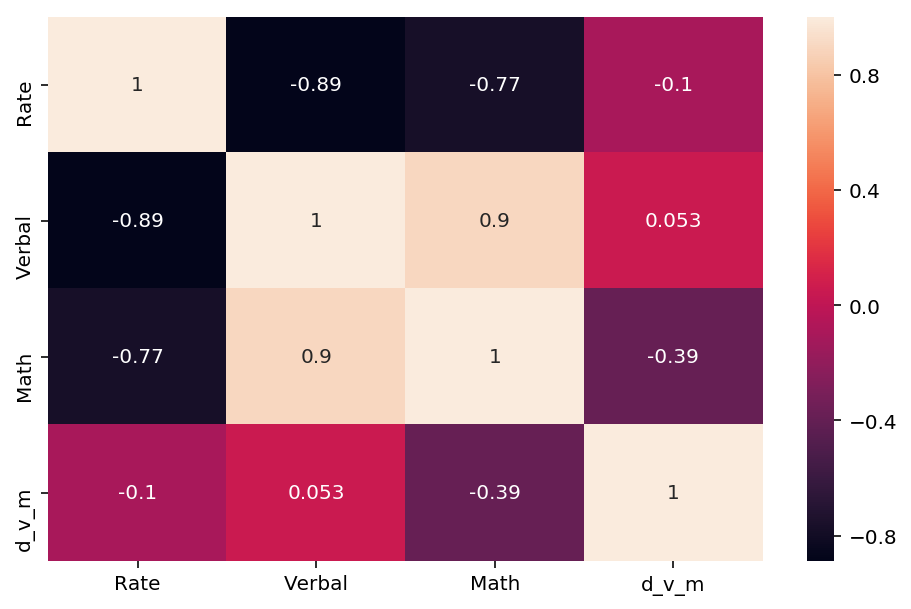

In [29]:
plt.figure(figsize=(8,5)) 
sns.heatmap(df.corr(), annot=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [30]:
df.describe()

,Rate,Verbal,Math,d_v_m
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

The  data requires cleaning,as the age column entered in bracket value(-):

In [31]:
df2 = pd.read_csv('drug-use-by-age.csv')
df2.head(3)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [32]:
df2.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
n,2798,2757,2792,2956,3058,3038,2469,2223,2271,2354,4707,4591,2628,2864,7391,3923,2448
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75,67.2,49.3
alcohol-frequency,3,6,5,6,10,13,24,36,48,52,52,52,52,52,52,52,52
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33,28.4,24.9,20.8,16.4,10.4,7.3,1.2
marijuana-frequency,4,15,24,25,30,36,52,60,60,52,52,60,52,72,48,52,36
cocaine-use,0.1,0.1,0.1,0.5,1,2,3.2,4.1,4.9,4.8,4.5,4,3.2,2.1,1.5,0.9,0
cocaine-frequency,5.0,1.0,5.5,4.0,7.0,5.0,5.0,5.5,8.0,5.0,5.0,6.0,5.0,8.0,15.0,36.0,-
crack-use,0,0,0,0.1,0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0
crack-frequency,-,3.0,-,9.5,1.0,21.0,10.0,2.0,5.0,17.0,5.0,6.0,6.0,15.0,48.0,62.0,-


In [33]:
df2.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [34]:
#df2.isnull().values

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

THE ABOCE DDESRIPTION SUGGETS THAT , THE AGE COLUMN AND SOME OF THE OTHER COLUMN ARE OBJECTS, WHICH ARE NEEDED TO BE CONVERTED INTO FLOAT DATA TYPE.

In [36]:

# convert all data to float
def data_clean(x):
    #remove empty space if any
    x = x.replace(' ', '')
    
#convert to float where possible
    x = x.replace('-','0')
    try:
        return float(x)
    except:
        return float(0)


In [37]:
# check data and clean
def age_conversion(x):
    
    returnAge = 0.0
    x = str(x)
    try:
#remove empty space if any
        x = x.replace(' ', '')
    except:
        pass
    
#find symbols in text
    dash = "-"
    plus = "+"
    indexDash = x.find(dash)
    indexPlus = x.find(plus)
    
#get the age value
    if indexDash > 0:
#found dash, get average value
        returnAge = (float(x[:indexDash]) + float(x[indexDash+1:]))/2
    elif indexPlus > 0:
#found plus, get the age only
        returnAge = x[:indexPlus]
    else:
        returnAge = x

#turn to float instead of string
    try:
        float(returnAge)
    except:
        returnAge = float(0)
        
    return (returnAge)

In [38]:
#go through all columns with object type values
#excect age, and convert data including '-' to float

for col_name in df2.columns:
#check if it is an object type
    if df2[[col_name]].dtypes.values[0] == 'O':
        if (col_name != 'age'):
            #print (col_name)
            df2[col_name] = df2[col_name].map(data_clean)        
        elif (col_name == 'age'):
            #perform addiional cleaning
            #i.e. 12, 22-23 or 65+
            df2[col_name] = df2[col_name].map(age_conversion)

In [39]:
df2.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [40]:

#plt.figure(figsize=(18, 16))
#sns.heatmap(df2.describe(), annot=True)

we need to find the usage of drug , in order to do that we need to create separate columns for the usage, and plot the the usage columns.

In [41]:
#columns names wiht use
use_cols = [colName for colName in df2.columns if 'use' in colName ]
#getting columns only for use cols
usageSeries = df2[use_cols]
usageDf = pd.DataFrame(usageSeries)
# usageDf.rename(index = ['ageDict'], inplace=True)
# usageDf.index = ['ageDict']
usageDf.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


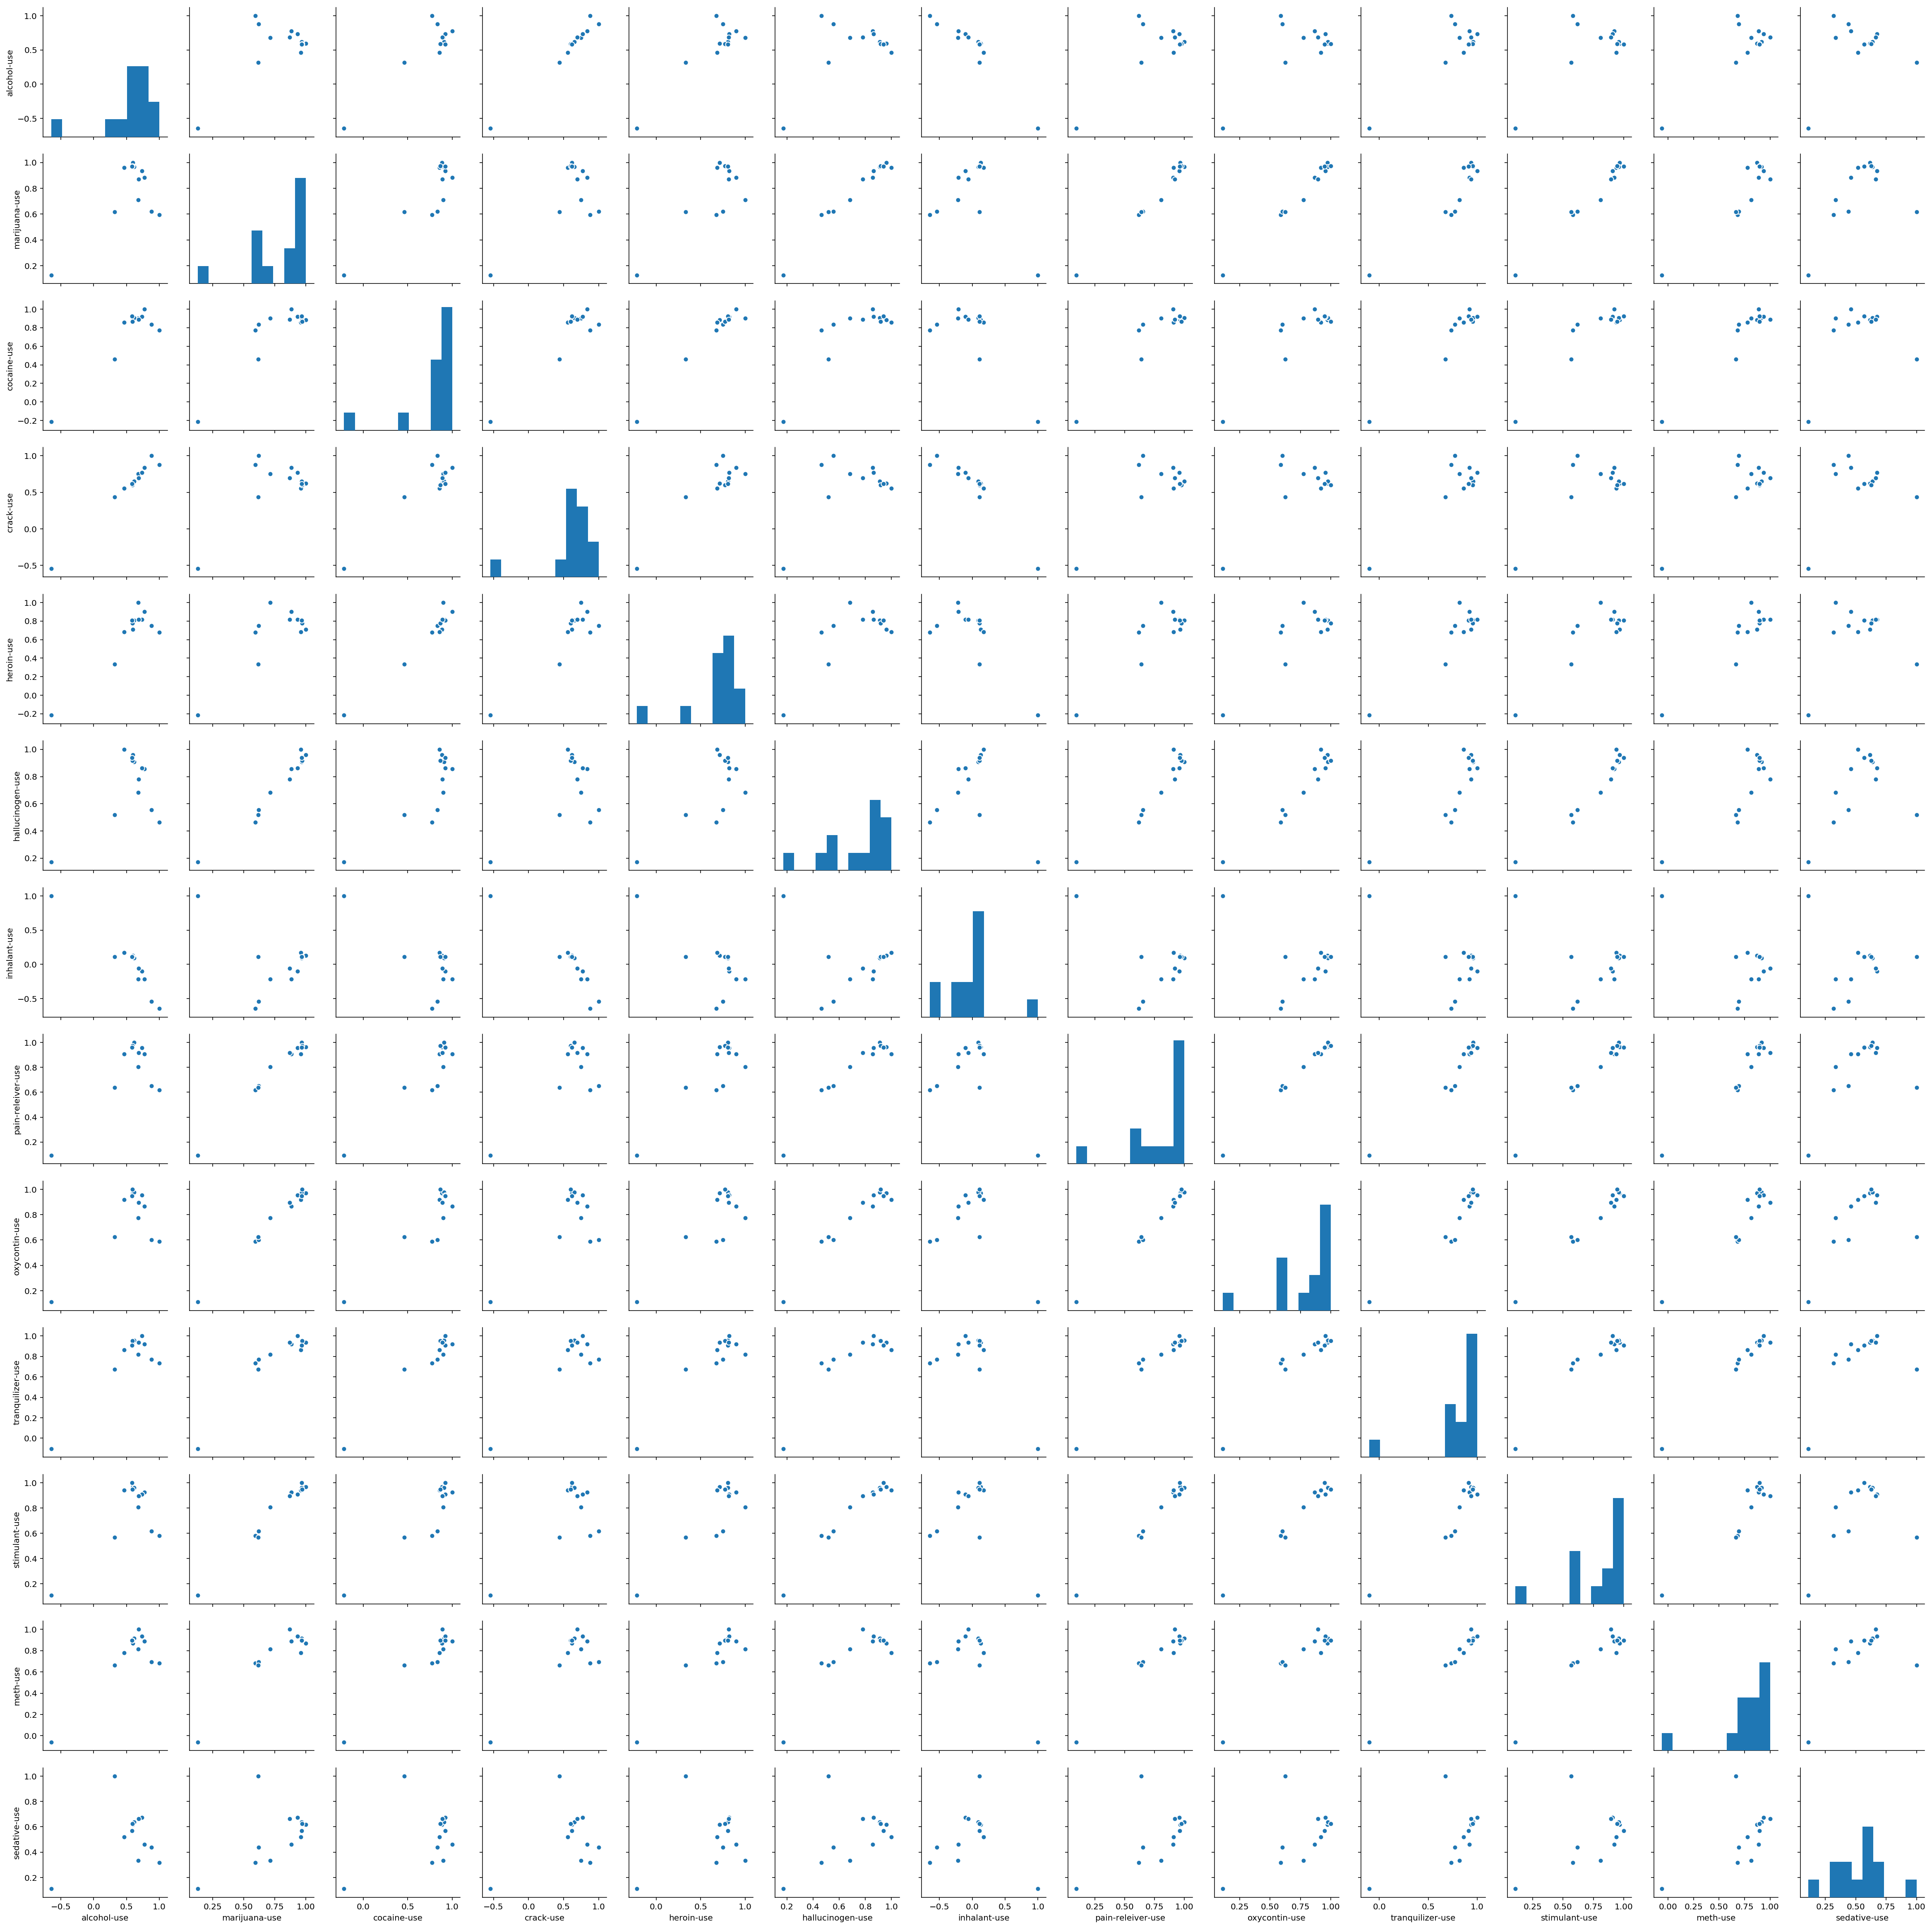

In [42]:
sns.pairplot(usageDf.corr())

seems to be the correlation is strong in top right 

In [43]:
#ax = usageDf.plot(kind='bar',stacked = False, colormap = 'Paired')
#for p in ax.patches:
    #ax.annotate(np.round(p.get_height(),decimals=1), (p.get_x()+p.get_width()/2.,   p.get_height()), ha='center', va='center', xytext=(10, 15), textcoords='offset points')
#plt.ylabel('DRUG IN INTAKE')
#plt.title('Age Distribution Based Upon drug Intake')
#plt.show()

Text(0.5,1,'Drug Usage amount per age group')

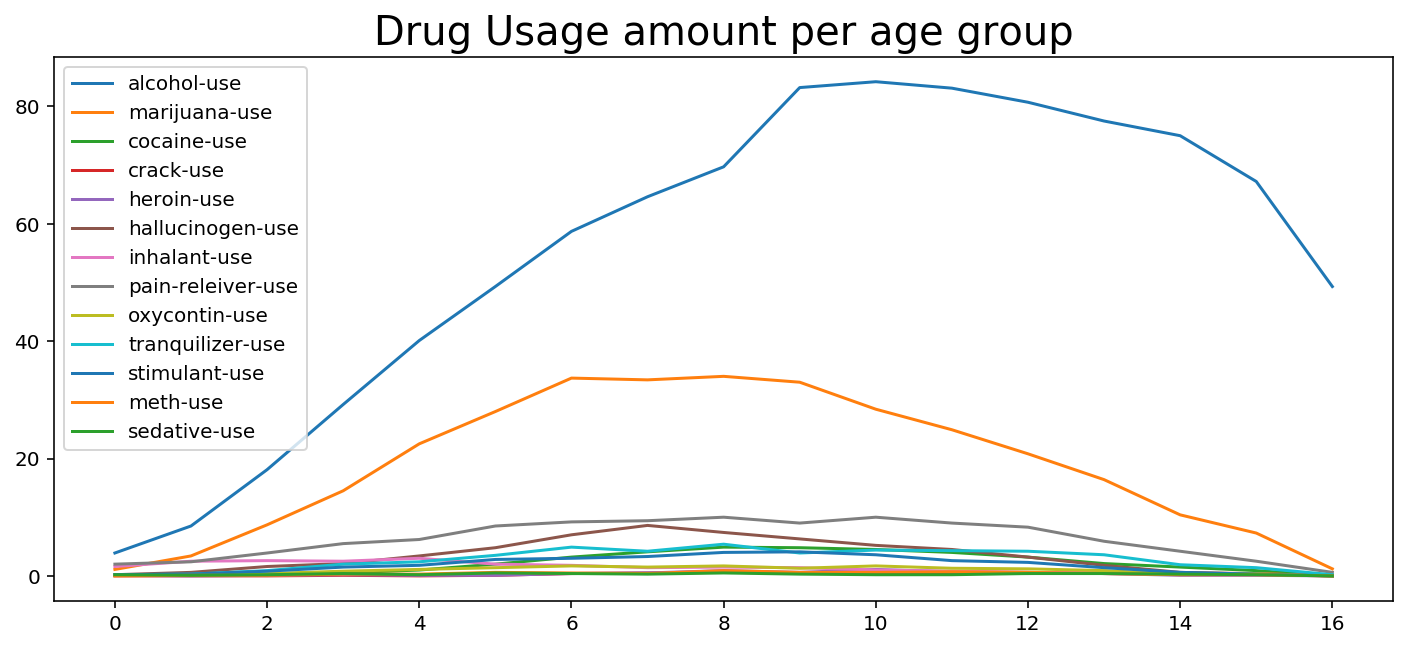

In [44]:
z = usageDf.plot(figsize=(12, 5))
z.set_title("Drug Usage amount per age group", fontsize=20)

To find the highest usage counts of drug, the best way is to plot bar plot

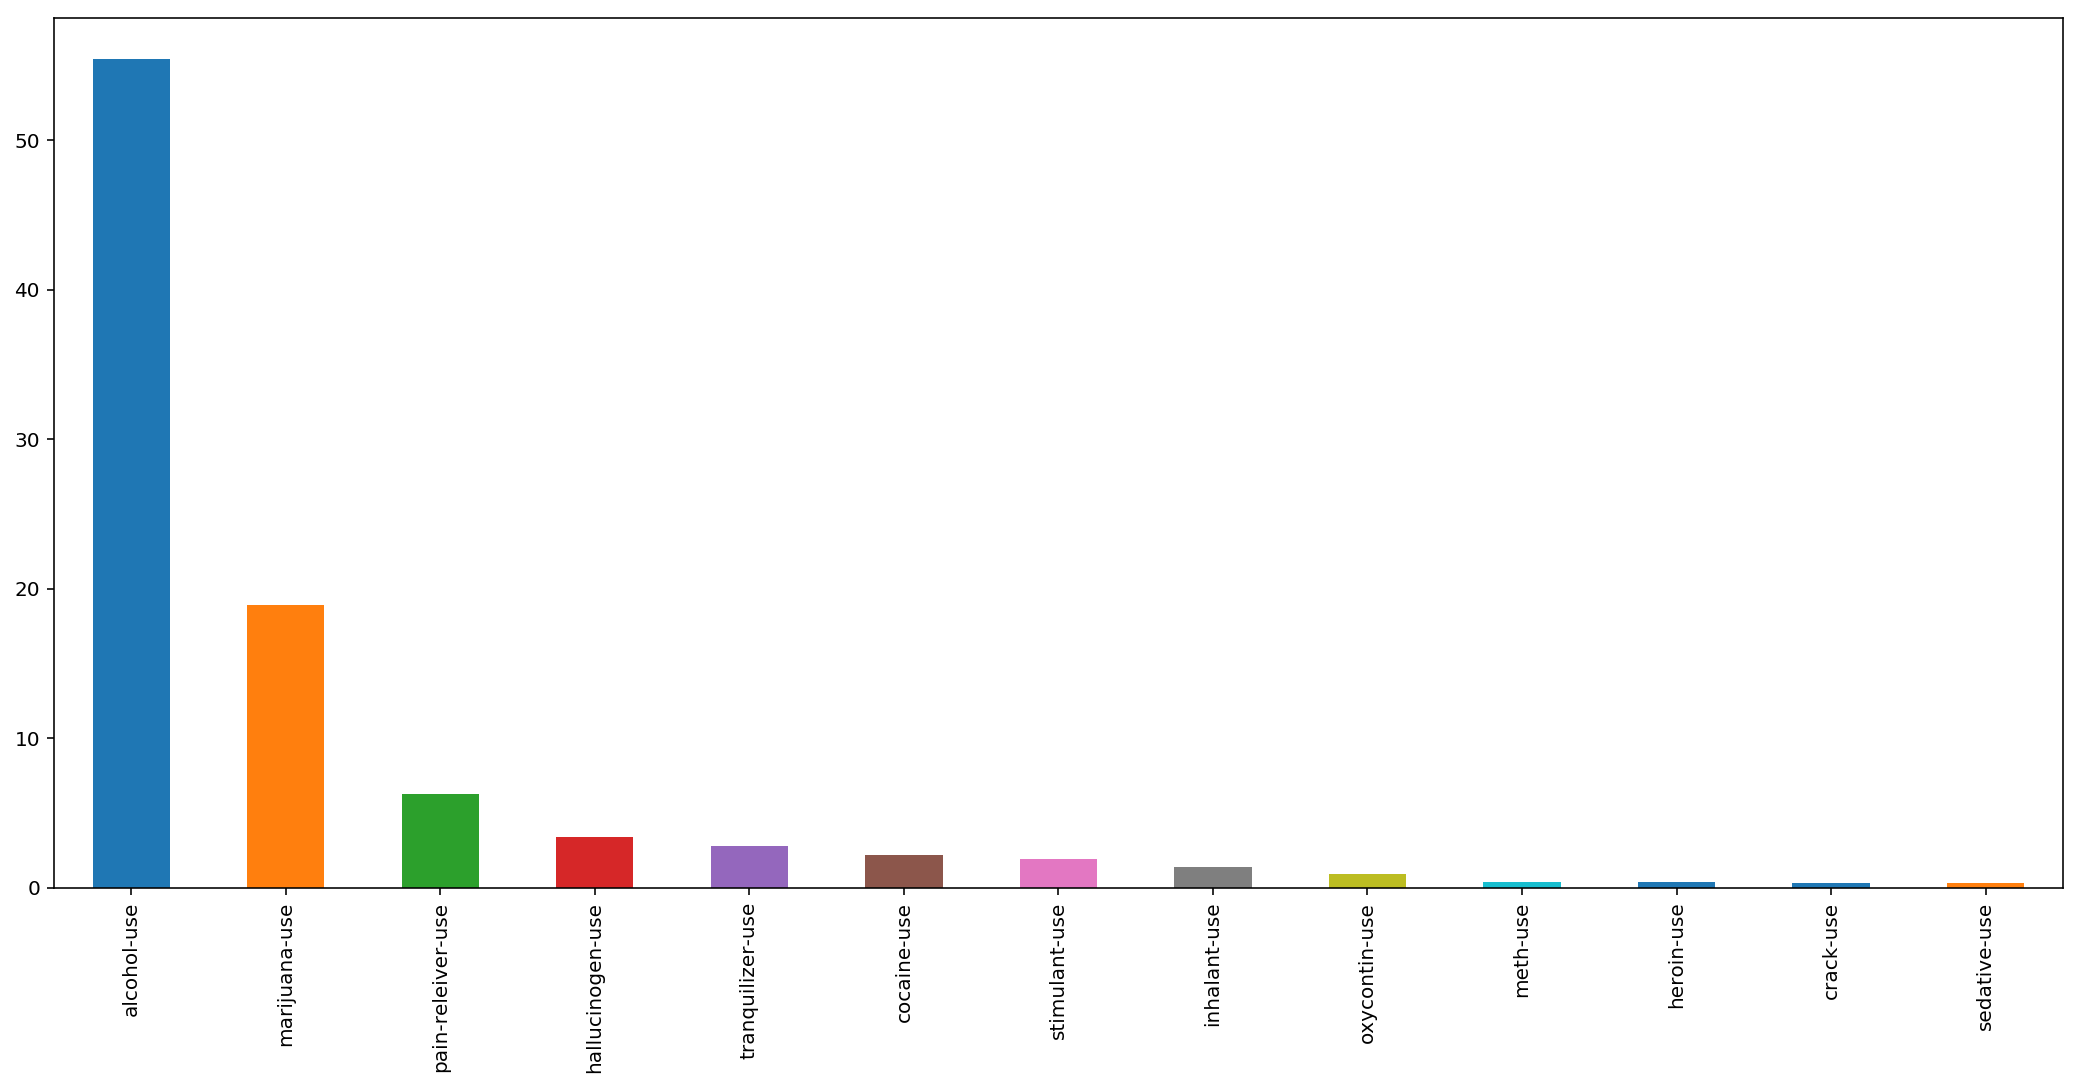

In [45]:
usageDf.mean().sort_values(ascending=False).plot(kind='bar', figsize=(18, 8))

based on the above plot , alchohal use and marijuana uses are the highest,the usage is increasing from teenage  to in early 20.

Now we will look at frequency columns and plot them., in order to do that we need to create separate dataframe for frequency columns.

In [46]:
#columns names with frequency
freq_cols = [colName for colName in df2.columns if 'frequency' in colName]
#columns  for frequency
freqSeries = df2[freq_cols]
freq_Df = pd.DataFrame(freqSeries)
#freq_Df.rename(index = ageDict, inplace=True)
freq_Df.describe()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,33.352941,42.941176,7.411765,12.382353,68.970588,8.411765,5.794118,14.705882,13.941176,11.735294,31.147059,31.735294,19.382353
std,21.318833,18.362566,8.014119,17.361532,70.153285,15.000245,4.937291,6.935098,12.902134,11.485205,85.973790,32.206423,24.833527
min,3.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.000000,0.000000,4.500000,2.000000,0.000000,3.000000
25%,10.000000,30.000000,5.000000,2.000000,35.500000,3.000000,3.000000,12.000000,5.000000,6.000000,7.000000,10.500000,6.500000
50%,48.000000,52.000000,5.000000,6.000000,50.000000,3.000000,4.000000,12.000000,12.000000,10.000000,10.000000,24.000000,10.000000
75%,52.000000,52.000000,7.000000,15.000000,66.500000,4.000000,5.500000,15.000000,17.500000,11.000000,12.000000,46.000000,17.500000
max,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.000000,364.000000,105.000000,104.000000


Text(0.5,1,'frequency of drug usage per age group')

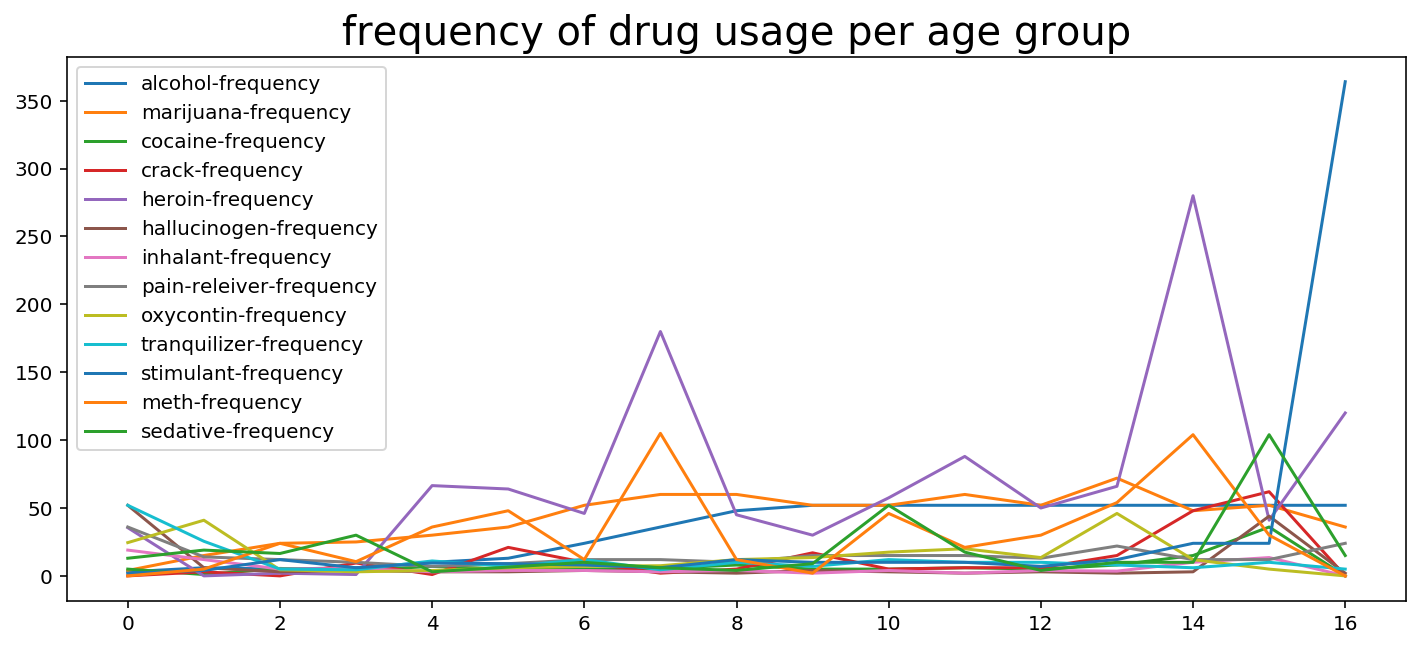

In [47]:
z = freq_Df.plot(figsize=(12, 5))
z.set_title("frequency of drug usage per age group", fontsize=20)

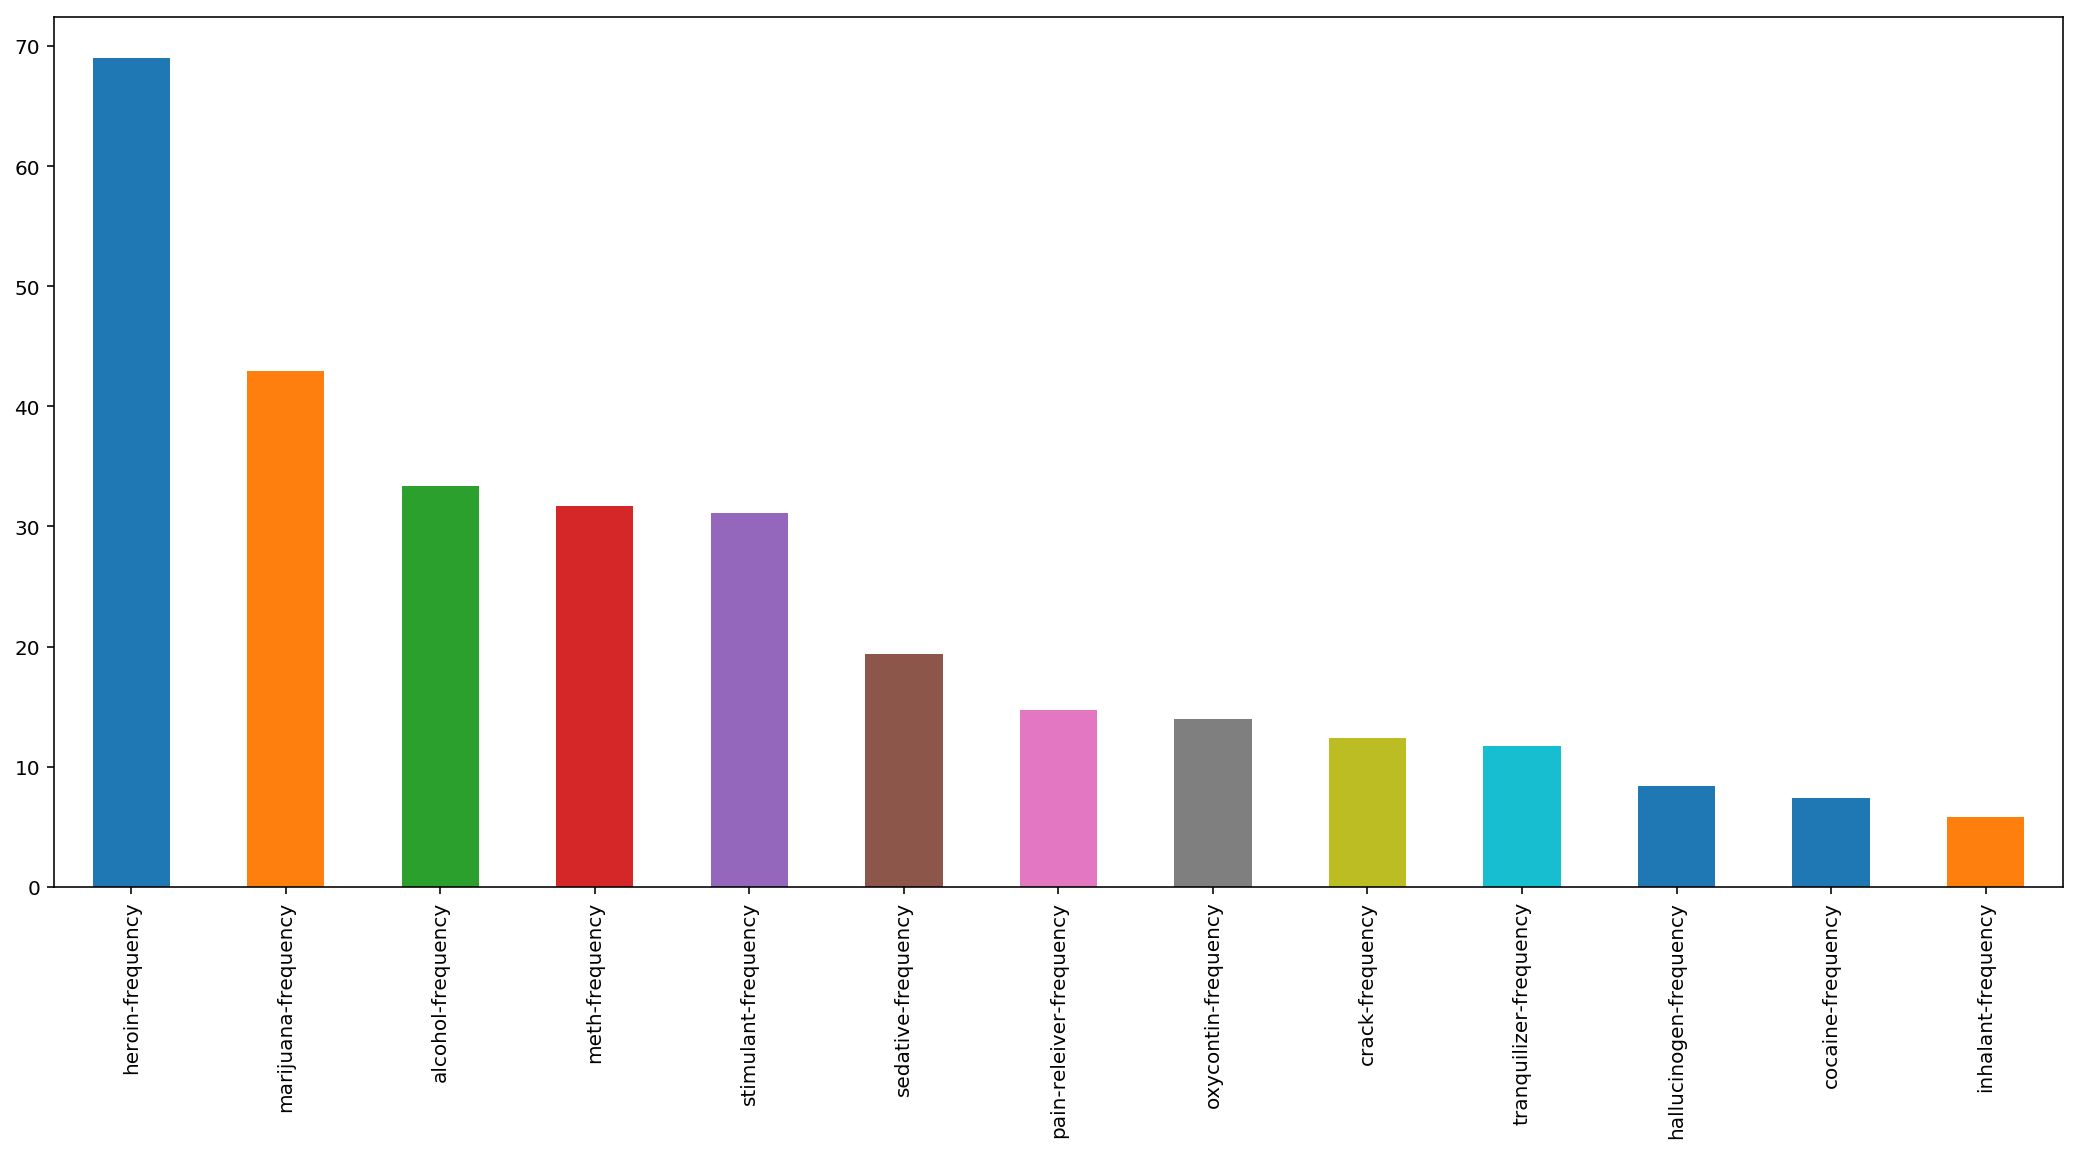

In [48]:
freq_Df.mean().sort_values(ascending=False).plot(kind='bar', figsize=(18, 8))

Based on the frequency bar chart. Heroin, Marijuana and alchohol are the 3 most frequently used.

to get more clear picture , we will convert frequency values into percentage

In [49]:
#trying to put the age back in as the index by using dictionary
ageIndex = np.array(df2['age']).astype(int)
print (ageIndex)

[12 13 14 15 16 17 18 19 20 21 22 24 27 32 42 57 65]


In [50]:
#now set the index column as age
df2.set_index('age')
df2['age'] = ageIndex

In [51]:
#agedict
ageDict = dict(zip(range(17), ageIndex))

In [52]:
#now getting the amount of total usage 
drugConsumptionDf = pd.DataFrame()
for pos, colName in enumerate(usageDf.columns):
    drugColData = []
    col = colName.split("-")
    drugColData = usageDf.iloc[:, pos] * freq_Df.iloc[:, pos]
    drugConsumptionDf[col[0]] = drugColData.values
    
drugConsumptionDf['sumByAge'] = drugConsumptionDf.sum(axis=1)    
drugConsumptionDf.rename(ageDict)

,alcohol,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain,oxycontin,tranquilizer,stimulant,meth,sedative,sumByAge
12,11.7,4.4,0.50,0.00,3.55,10.4,30.40,72.0,2.45,10.40,0.4,0.00,2.60,148.80
13,51.0,51.0,0.10,0.00,0.00,3.6,30.00,33.6,4.10,7.65,1.2,0.50,1.90,184.65
14,90.5,208.8,0.55,0.00,0.20,4.8,13.00,46.8,1.80,4.50,9.6,2.40,3.30,386.25
15,175.2,362.5,2.00,0.95,0.20,8.4,13.75,55.0,2.40,9.00,9.0,3.15,12.00,653.55
16,401.0,675.0,7.00,0.00,6.65,10.2,9.00,43.4,4.40,26.40,17.1,10.80,0.60,1211.55
17,640.9,1008.0,10.00,2.10,6.40,14.4,8.00,76.5,8.40,24.50,25.2,28.80,3.25,1856.45
18,1408.8,1752.4,16.00,4.00,18.40,28.0,7.20,110.4,11.90,58.80,24.0,6.00,4.00,3449.90
19,2325.6,2004.0,22.55,1.00,90.00,25.8,4.20,112.8,11.25,18.90,19.8,42.00,1.80,4679.70
20,3345.6,2040.0,39.20,3.00,40.50,14.8,6.00,100.0,20.40,54.00,48.0,10.80,2.00,5724.30
21,4326.4,1716.0,24.00,8.50,18.00,25.2,2.80,135.0,17.55,27.30,41.0,1.20,2.70,6345.65


In [53]:
df2.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


list from top to bottom of usage

In [54]:
top_to_bottom = drugConsumptionDf.sort_values("sumByAge", ascending=False)
top_5 = top_to_bottom.rename(ageDict).head(5)
top_5


,alcohol,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain,oxycontin,tranquilizer,stimulant,meth,sedative,sumByAge
21,4326.4,1716.0,24.0,8.5,18.00,25.2,2.8,135.0,17.55,27.3,41.0,1.2,2.7,6345.65
22,4378.4,1476.8,22.5,2.5,63.25,15.6,4.0,150.0,29.75,52.8,36.0,27.6,10.4,6269.60
24,4321.2,1494.0,24.0,3.0,61.60,9.0,1.6,135.0,26.00,43.0,26.0,14.7,3.5,6162.60
20,3345.6,2040.0,39.2,3.0,40.50,14.8,6.0,100.0,20.40,54.0,48.0,10.8,2.0,5724.30
27,4196.4,1081.6,16.0,2.4,30.00,9.6,2.4,107.9,16.20,42.0,16.1,18.0,1.6,5540.20


In [55]:
top_5.sumByAge

21    6345.65
22    6269.60
24    6162.60
20    5724.30
27    5540.20
Name: sumByAge, dtype: float64

plot the usage in pie chart

In [86]:
labels = top_5.index.values
#sizes = top_5.sumByAge

#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
       # shadow=True, startangle=1)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax1.set_title("Top 5 by age for drug consumption in %", fontsize=25)
#plt.show()
top_5.plot.hist


<bound method FramePlotMethods.hist of <pandas.plotting._core.FramePlotMethods object at 0x1a309b40f0>>

     The above chart suggests,consumptions are highest between 21 - 27 years of age

REPORT:

The top 3 drugs uses are Alcohol, Marijuana and Pain Relievers.

The scale of the top 2 exceed all other drugs types. Therefore the main education focus should be related to those 2 drugs usage.

The top main users are aged between 21 - 27 years of age. The trend is showing that the drug uses starts to increase in their teenage years.

Therefore drug eductions should be early from Junior to High Schools.



### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

Null Hypothesis:

Non controlled Drugs consumption mean is the same as controlled drugs consumption

Althernate Hypothesis:

Non controlled Drugs consumption is higher than all controlled drugs consumption

** Question and deliverables**


...

In [68]:
# Code
from scipy import stats
from scipy.stats import t

In [69]:
usageDf.head(3)

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2


alchohal use is not controlled substance

In [70]:
#excepting alchohal use
usageDf.iloc[:, 1:].T.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
marijuana-use,1.1,3.4,8.7,14.5,22.5,28.0,33.7,33.4,34.0,33.0,28.4,24.9,20.8,16.4,10.4,7.3,1.2
cocaine-use,0.1,0.1,0.1,0.5,1.0,2.0,3.2,4.1,4.9,4.8,4.5,4.0,3.2,2.1,1.5,0.9,0.0
crack-use,0.0,0.0,0.0,0.1,0.0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0.0
heroin-use,0.1,0.0,0.1,0.2,0.1,0.1,0.4,0.5,0.9,0.6,1.1,0.7,0.6,0.4,0.1,0.1,0.0
hallucinogen-use,0.2,0.6,1.6,2.1,3.4,4.8,7.0,8.6,7.4,6.3,5.2,4.5,3.2,1.8,0.6,0.3,0.1


SEPARATE CONTROLLED AND NONCONTROLLED USEAGE INTO SEPARATE COLUMNS

In [71]:
#control drug usage
control_Df = pd.DataFrame(usageDf.iloc[:, 1:].T.head().sum())
control_Df.columns = ['cont_drug-use']
control_Df.head()


,cont_drug-use
0,1.5
1,4.1
2,10.5
3,17.4
4,27.0


In [72]:
#non controlled drug usage
nonControlDf = usageDf[['alcohol-use']]
nonControlDf.columns = ['non_con_drug-use']
nonControlDf.head()

,non_con_drug-use
0,3.9
1,8.5
2,18.1
3,29.2
4,40.1


In [73]:
control_Df['cont_drug-use'].mean()


25.14117647058823

In [74]:
nonControlDf['non_con_drug-use'].mean()

55.42941176470588

In [75]:
t_stat = stats.ttest_ind(nonControlDf, control_Df)

In [76]:
t_stat.statistic

array([3.94701673])

In [77]:
t_stat.pvalue/2

array([0.00020318])

In [78]:
control = control_Df['cont_drug-use'].values
t_interval_95_control = t.interval(0.95,
                           len(control)-1,
                           loc=np.mean(control),
                           scale=np.std(control, ddof = 1)/(len(control))**0.5)

In [79]:
nonControl = nonControlDf['non_con_drug-use'].values
t_interval_95_noncontrol = t.interval(0.95,
                           len(nonControl)-1,
                           loc=np.mean(nonControl),
                           scale=np.std(nonControl, ddof = 1)/(len(nonControl))**0.5)

In [80]:
control_lower = t_interval_95_control[0]
control_upper = t_interval_95_control[1]

In [81]:
nonControl_lower = t_interval_95_noncontrol[0]
nonControl_upper = t_interval_95_noncontrol[1]

C:\Users\hiren\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


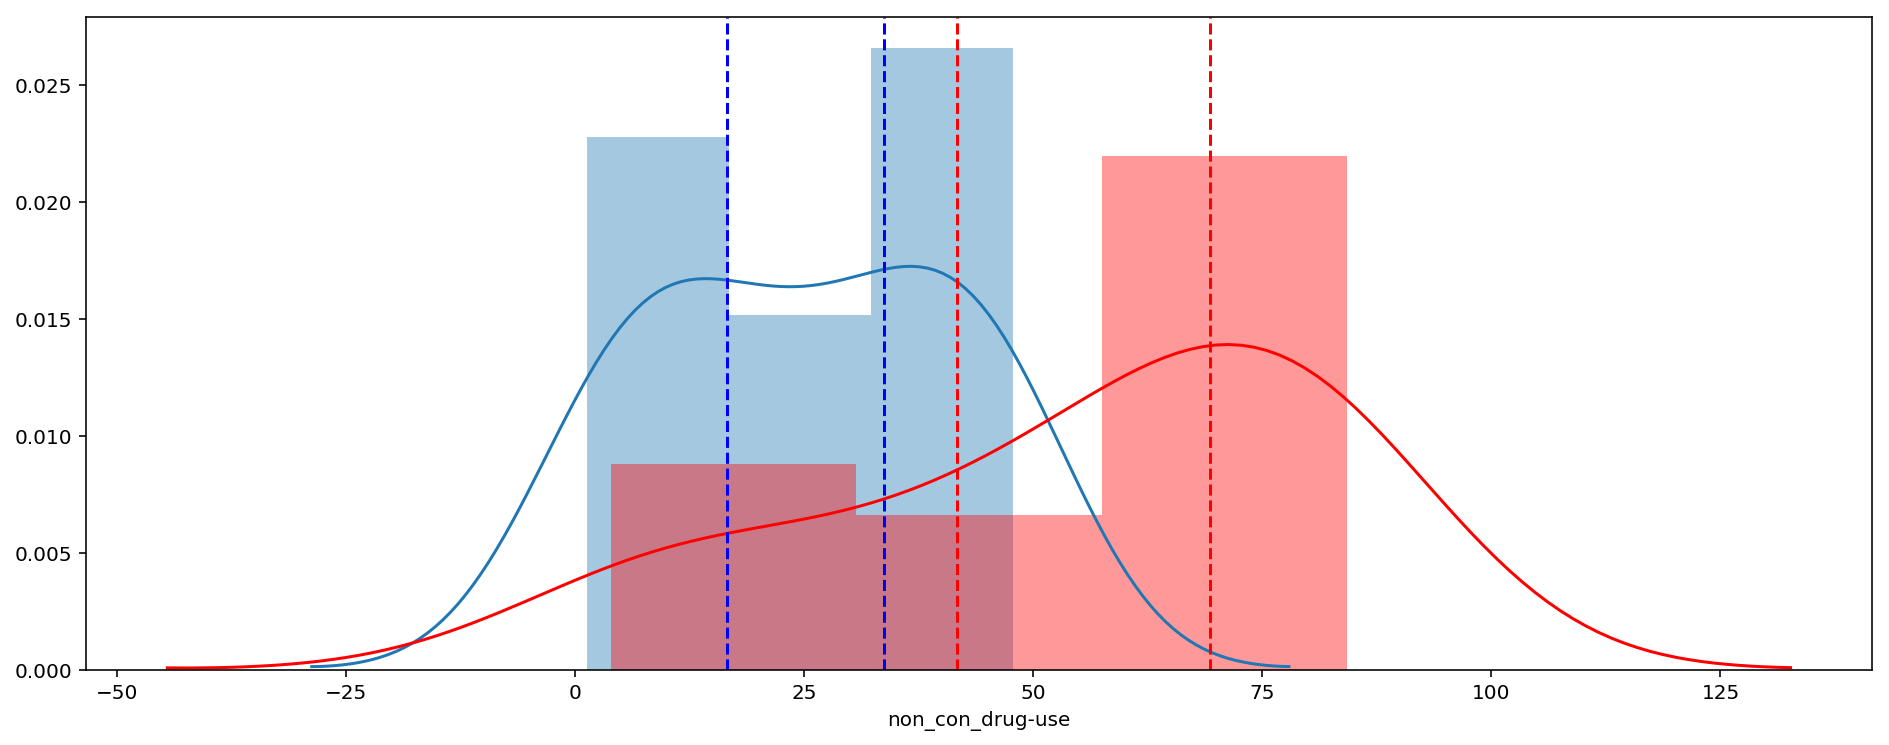

In [82]:
(fig, ax) = plt.subplots(figsize=(16, 6))
sns.distplot(control_Df['cont_drug-use'], ax=ax)
sns.distplot(nonControlDf['non_con_drug-use'], ax=ax, color='red')


plt.axvline(x = control_lower, color='b', linestyle='--')
plt.axvline(x = control_upper, color='b', linestyle='--')

plt.axvline(x = nonControl_lower, color='r', linestyle='--')
plt.axvline(x = nonControl_upper, color='r', linestyle='--')

**Report**



...

Control usage mean (Prescription and Illegal Drugs) is 25.14117647058823 Non-Control (Alcohol) usage mean is 55.42941176470588 T_Stat.statistic is 3.94701673 P Value is 0.00020318 (for each tail)

We reject our null hypothesis and conclude that the true mean of Non-Control (in this case only alchohol) Drug Usage value is the same as the mean of All (12 different types of drugs combine) Control Drug Usage value.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [83]:
df.head()

,State,Rate,Verbal,Math,d_v_m
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


we need to drop the rate column from data frame

In [84]:
NoRateDf = df.copy(True)
NoRateDf = df.drop(columns=['Rate'])
NoRateDf.head()

,State,Verbal,Math,d_v_m
0,CT,509,510,-1
1,NJ,499,513,-14
2,MA,511,515,-4
3,NY,495,505,-10
4,NH,520,516,4


In [85]:
NoRateDf.describe()

,Verbal,Math,d_v_m
count,52.000000,52.000000,52.000000
mean,532.019231,531.500000,0.519231
std,33.236225,36.014975,15.729939
min,482.000000,439.000000,-30.000000
25%,501.000000,504.000000,-6.000000
50%,526.500000,521.000000,0.000000
75%,562.000000,555.750000,4.250000
max,593.000000,603.000000,95.000000


In [86]:
NoRateDf.corr()

,Verbal,Math,d_v_m
Verbal,1.000000,0.899871,0.052600
Math,0.899871,1.000000,-0.388219
d_v_m,0.052600,-0.388219,1.000000


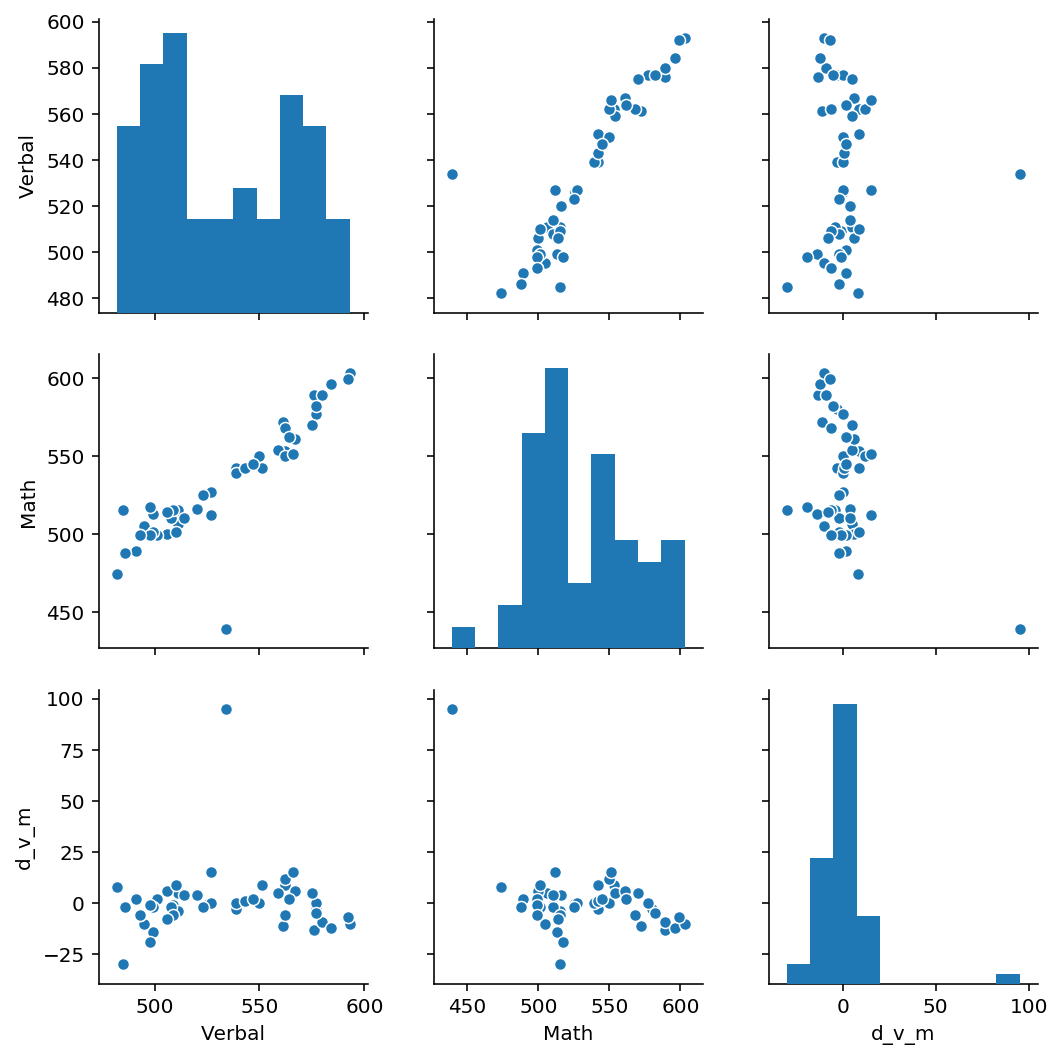

In [87]:
#use pairplot to see if there is an outlier
sns.pairplot(NoRateDf)

# outliers are  < or > 3 standard deviation away from the mean

Now we calculate the outliers for verbak and math.

In [88]:
#VERBAL
verbalMean = NoRateDf['Verbal'].mean()
verbalStd = 3 * NoRateDf['Verbal'].std()
verbalLower = verbalMean - verbalStd
verbalUpper = verbalMean + verbalStd
print (verbalMean, verbalStd)
print (verbalLower, verbalUpper)


532.0192307692307 99.7086763313334
432.31055443789734 631.7279071005642


In [92]:
rowVerbalMask = (NoRateDf['Verbal'] < mathLower) | (NoRateDf['Verbal'] > mathUpper)

In [91]:
#math
mathMean = NoRateDf['Math'].mean()
mathStd = 3 * NoRateDf['Math'].std()
mathLower = mathMean - mathStd
mathUpper = mathMean + mathStd
print (mathMean, mathStd)
print (mathLower, mathUpper)

531.5 108.04492529662343
423.45507470337657 639.5449252966234


In [93]:
rowMathMask = (NoRateDf['Math'] < mathLower) | (NoRateDf['Math'] > mathUpper)

In [94]:
newSat1 = NoRateDf[rowMathMask]
newSat1.count()

State     0
Verbal    0
Math      0
d_v_m     0
dtype: int64

In [95]:
newSat2 = NoRateDf[rowVerbalMask]
newSat2.count()

State     0
Verbal    0
Math      0
d_v_m     0
dtype: int64

In [98]:
# find the outliers in a different way

outlier = NoRateDf['d_v_m'] == NoRateDf['d_v_m'].max()
no_outliers = NoRateDf.loc[outlier]

no_outliers

,State,Verbal,Math,d_v_m
27,OH,534,439,95


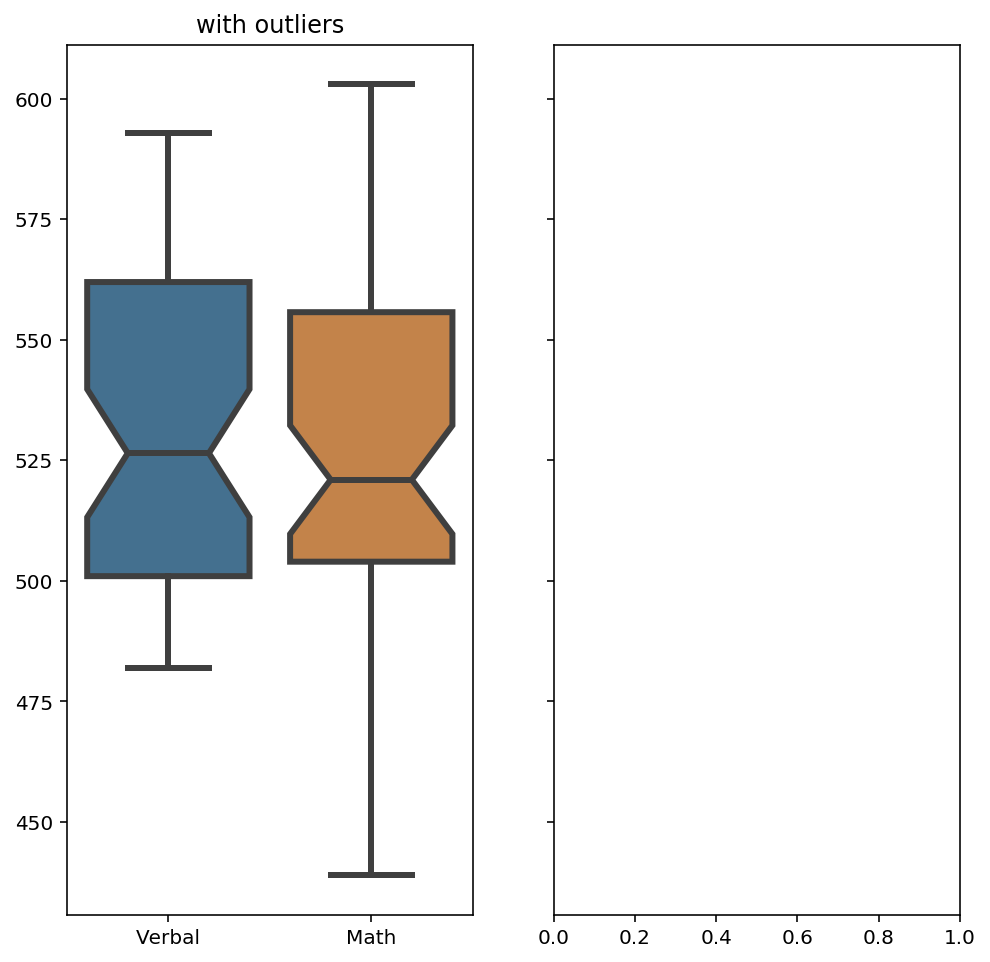

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(8,8))

ax = sns.boxplot(data=df[['Verbal', 'Math']], orient='v', fliersize=3, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax1)
ax.set_title("with outliers")


#ax1 = sns.boxplot(data=no_outliers[['Verbal', 'Math']], orient='v', fliersize=3, 
                 #linewidth=3, notch=True, saturation=0.5, ax=ax2)
#ax1.set_title("no outliers")

plt.show()

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.